In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from vamana_module import VamanaIndex
import time
from ucimlrepo import fetch_ucirepo 

from TopoMap import TopoMap

import gudhi

from TopoMapVamana import TopoMapVamana

c:\Users\felip\Documents\Github\TopoMap\vamana\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from keras.datasets import mnist


In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
Mnist_sample_X = train_X[0:100]
Mnist_sample_Y = train_y[0:100]

In [9]:
Mnist_sample_X = Mnist_sample_X.reshape(100,28*28)

In [13]:
def plot_persistance_diagrams_projection(X, proj, y, y_column='class'):
    rips_original = gudhi.RipsComplex(points=X.to_numpy())
    st_original = rips_original.create_simplex_tree(max_dimension=1)

    rips_proj = gudhi.RipsComplex(points=proj)
    st_projection = rips_proj.create_simplex_tree(max_dimension=1)

    diag_original = st_original.persistence(min_persistence=0)
    diag_proj = st_projection.persistence(min_persistence=0)

    I_original = st_original.persistence_intervals_in_dimension(1)
    I_proj = st_projection.persistence_intervals_in_dimension(1)

    bt_blobs = gudhi.bottleneck_distance(I_original, I_proj)
    print(f"Bottleneck distance: {bt_blobs:.10f}")    

    # Create image
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    gudhi.plot_persistence_diagram(diag_original, axes=axs[0])
    axs[0].set_title('Persistance - Original Points')

    gudhi.plot_persistence_diagram(diag_proj, axes=axs[1])
    axs[1].set_title('Persistance - Projections')

    colors = [px.colors.qualitative.D3[i] for i in range(10)]

    i = 0
    for cluster in y[y_column].unique():
        i_cluster = list(y[y[y_column]==cluster].index)
        axs[2].scatter(proj[i_cluster,0], proj[i_cluster,1],
                c=colors[i], s=5)
        i += 1
    axs[2].set_xticks([])
    axs[2].set_yticks([])
    axs[2].set_title('Projection')
    
    fig.suptitle('Persistence diagrams and Projection')
    fig.tight_layout()
    
    return fig

In [18]:

def Run_Vamana_test(X,y,dataset_name,y_column = 'class', Isnumpy = False):
    if(Isnumpy != True):
        X_numpy = X.to_numpy(copy=True)
    else:
        X_numpy = X
    Possible_R = [1,5,10,15,20,25,30,35,40]
    Construct_Vamana_times = []
    Topomap_from_Vamana_times = []
    Topomap_Alone_time = None

    for R in Possible_R:
        Index = VamanaIndex(R =R)
        start = time.time()
        Index.create(X_numpy)
        end = time.time()
        Construct_Vamana_times.append([R,end - start])

        adj_matrix = Index.get_adj_matrix()
        start = time.time()
        topomap = TopoMapVamana(adj_matrix)
        proj = topomap.run()
        end = time.time()
        Topomap_from_Vamana_times.append([R,end - start])

        start = time.time()
        topomap_original = TopoMap(X)
        proj_original= topomap_original.run()
        end = time.time()
        Topomap_Alone_time = end - start




        fig = plot_persistance_diagrams_projection(X, proj, y,y_column=y_column)
        fig.suptitle(f'Persistance Diagrams and Projection with Vamana - R= {R}- {dataset_name} Dataset')
        plt.show()

    df_Construct_Vamana = pd.DataFrame(Construct_Vamana_times,columns = ["R","time(s)"])
    df_topomap_from_vamana = pd.DataFrame(Topomap_from_Vamana_times, columns = ["R","time(s)"])

    print(df_Construct_Vamana)
    print(df_topomap_from_vamana)
    print(f'topomap original time:{Topomap_Alone_time}')


Bottleneck distance: 0.0000000000


c:\Users\felip\Documents\Github\TopoMap\vamana\lib\site-packages\gudhi\persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

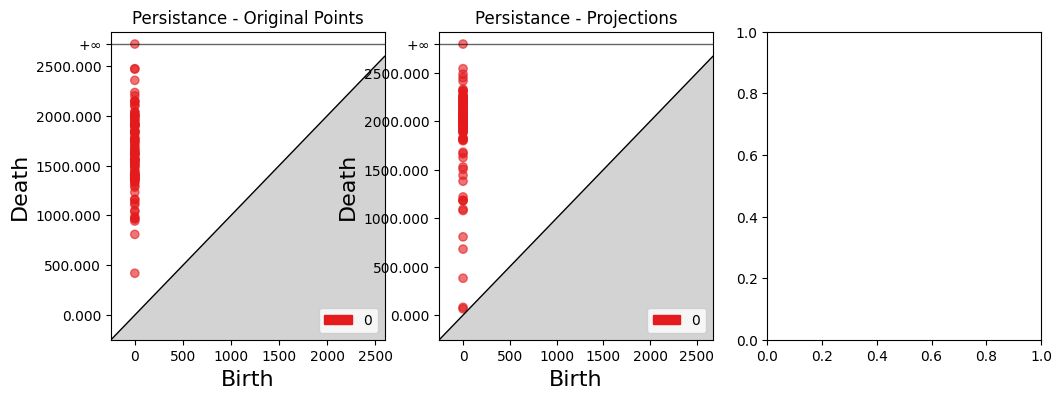

In [20]:
Run_Vamana_test(pd.DataFrame(Mnist_sample_X),Mnist_sample_Y,dataset_name="Mnist")

## Iris

In [4]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 


# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 




Bottleneck distance: 0.0000000000


c:\Users\felip\Documents\Github\TopoMap\vamana\lib\site-packages\gudhi\persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


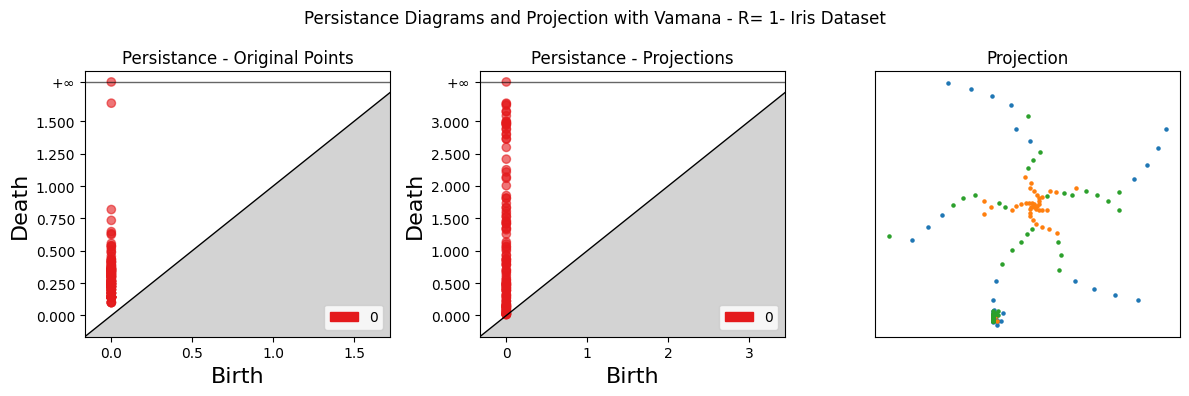

Bottleneck distance: 0.0000000000


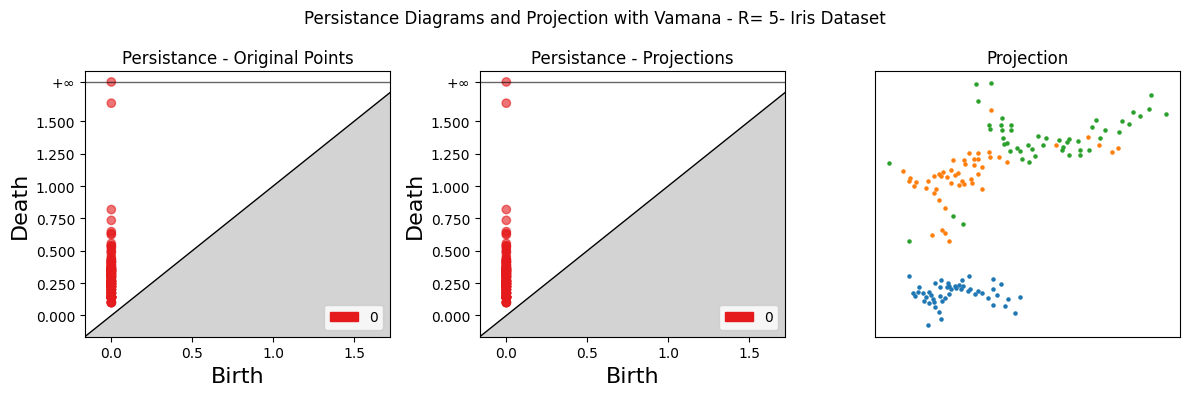

Bottleneck distance: 0.0000000000


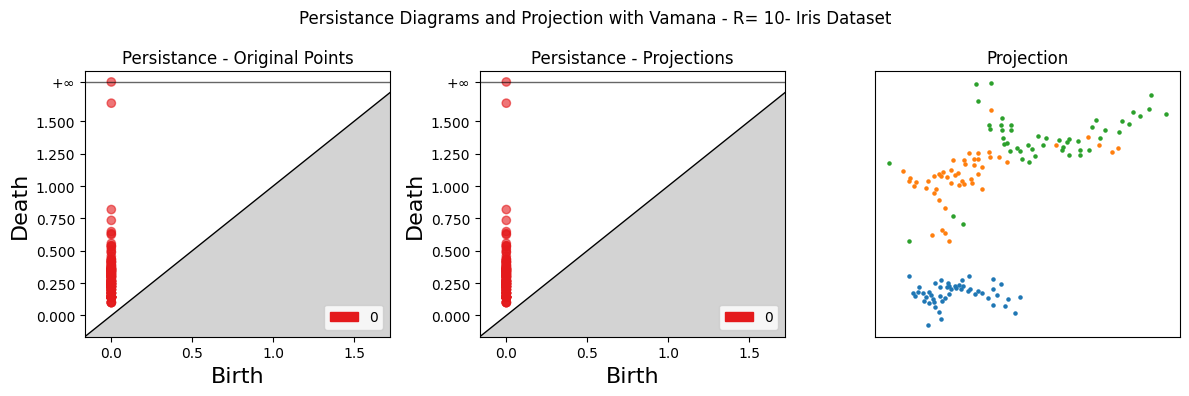

Bottleneck distance: 0.0000000000


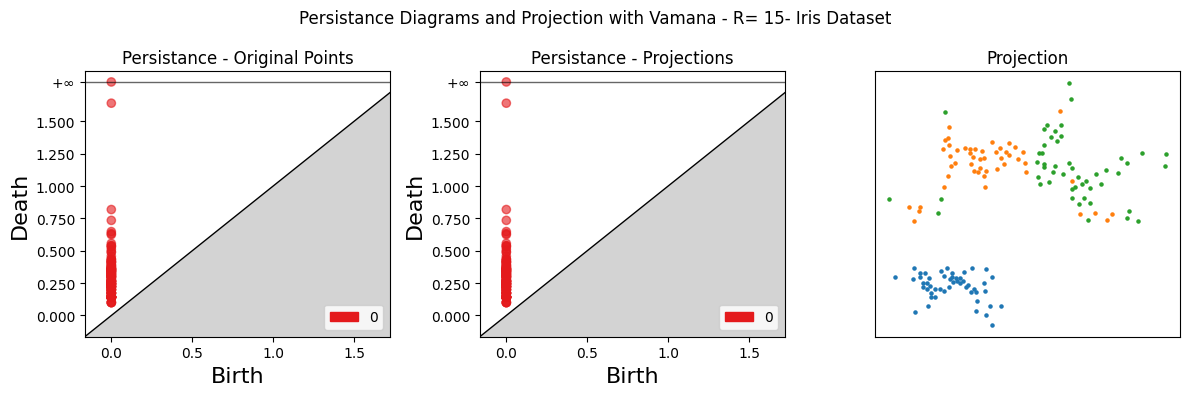

Bottleneck distance: 0.0000000000


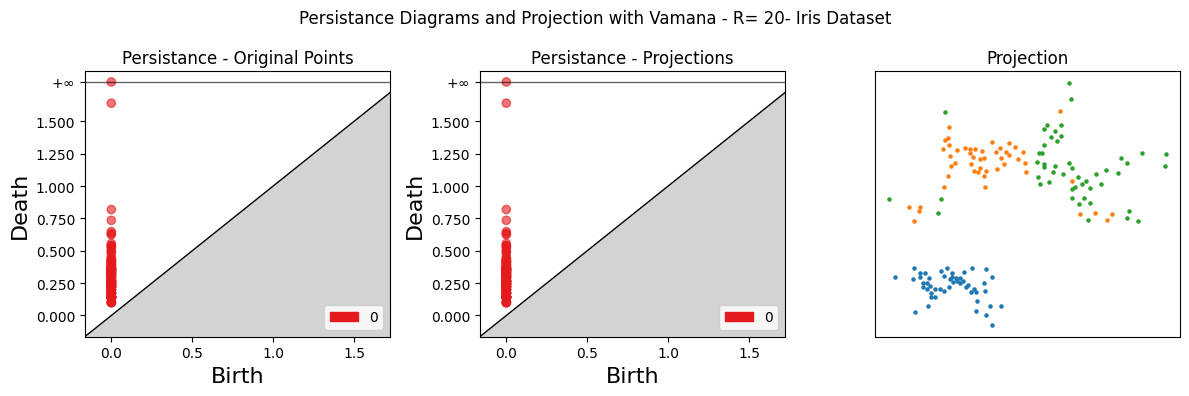

Bottleneck distance: 0.0000000000


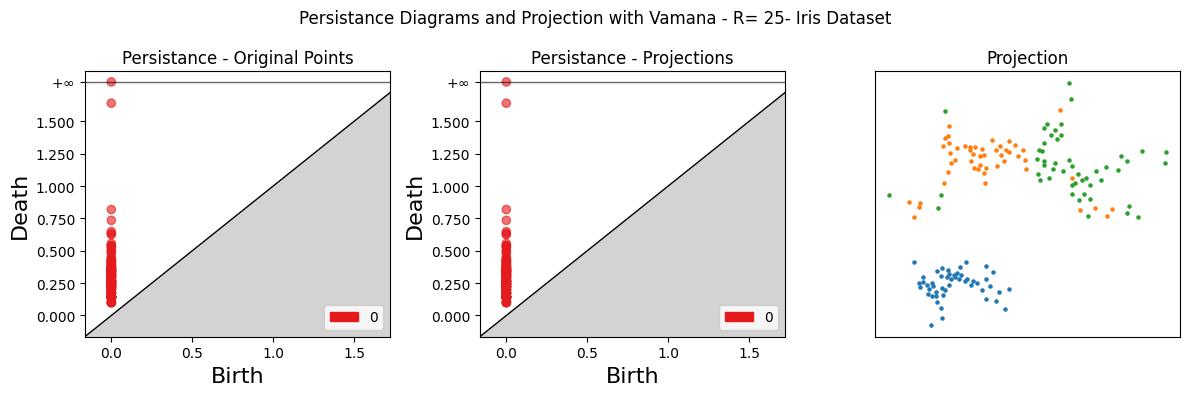

Bottleneck distance: 0.0000000000


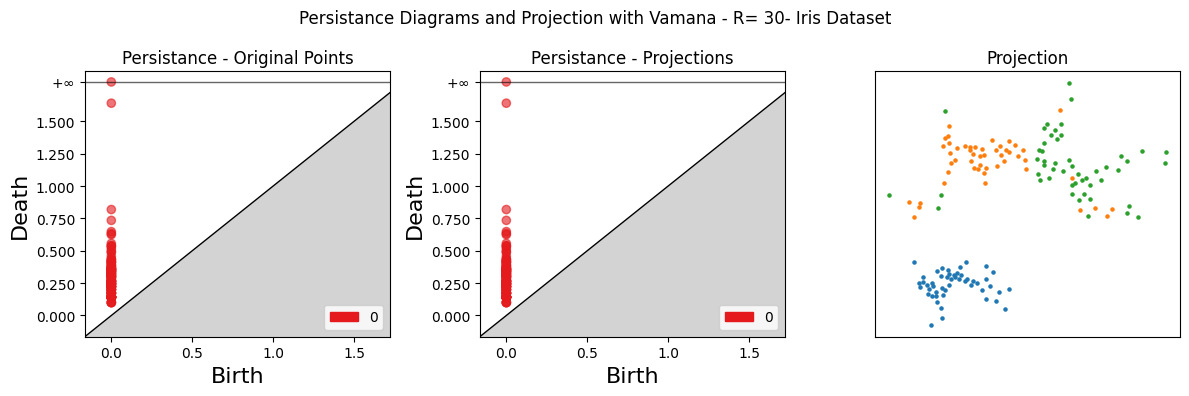

Bottleneck distance: 0.0000000000


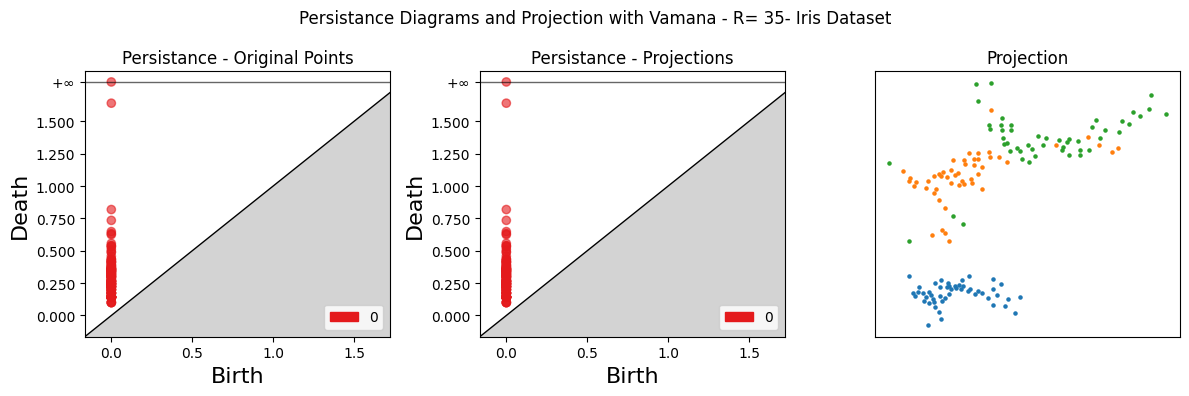

Bottleneck distance: 0.0000000000


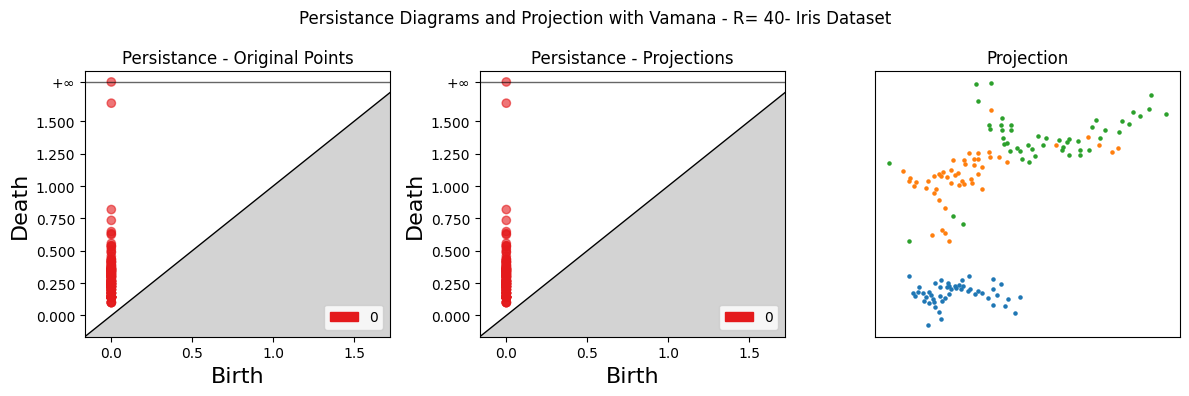

    R   time(s)
0   1  0.035620
1   5  1.022123
2  10  1.394641
3  15  1.389807
4  20  3.488162
5  25  3.373363
6  30  3.009525
7  35  1.863958
8  40  2.020504
    R   time(s)
0   1  0.115658
1   5  0.266902
2  10  0.128907
3  15  0.160197
4  20  0.198463
5  25  0.265271
6  30  0.098065
7  35  0.162170
8  40  0.156588
topomap original time:0.16954278945922852


In [5]:
Run_Vamana_test(X,y,dataset_name="Iris")

## Seeds

In [6]:
data_seeds = pd.read_csv('data/UCI/seeds/seeds_dataset.txt', sep='\t',
                         header=None,
                         names=['x1','x2','x3','x4','x5','x6','x7','class'])

X = data_seeds.copy().drop(['class'], axis=1)
y = data_seeds[['class']]


Bottleneck distance: 0.0000000000


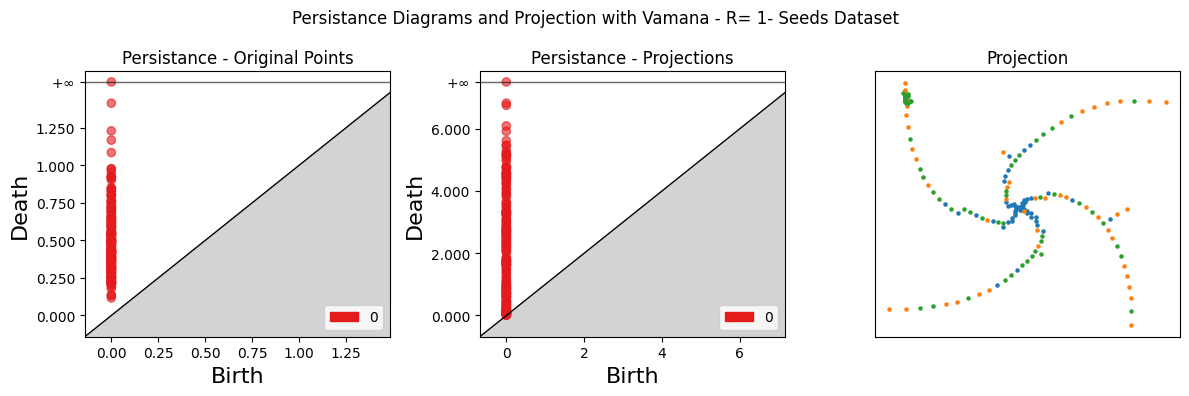

Bottleneck distance: 0.0000000000


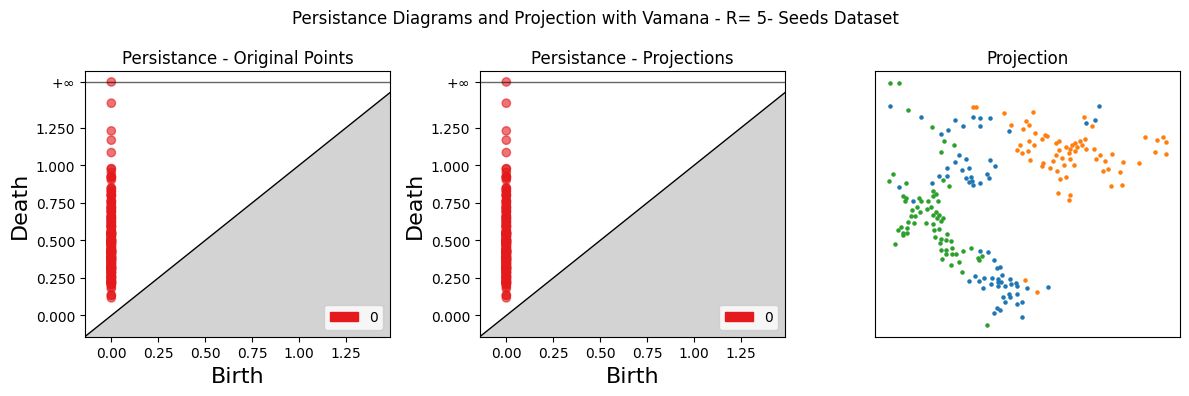

Bottleneck distance: 0.0000000000


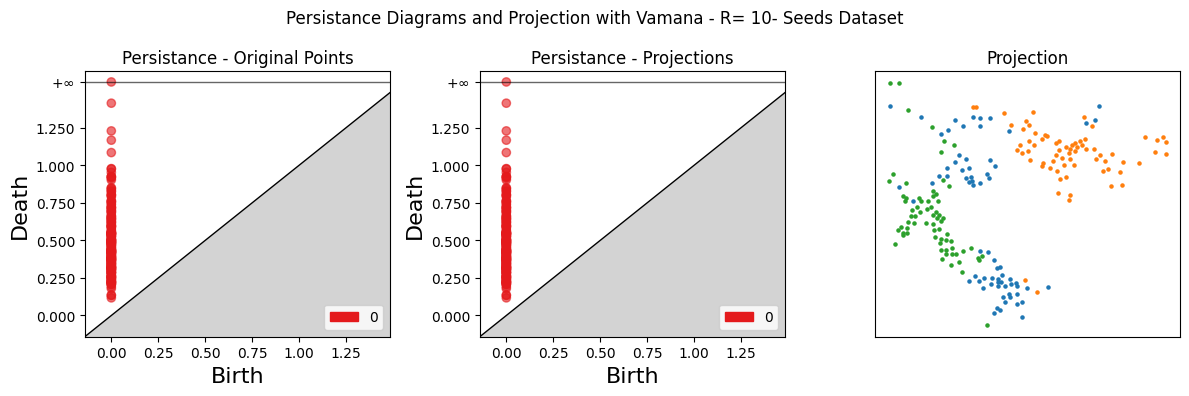

Bottleneck distance: 0.0000000000


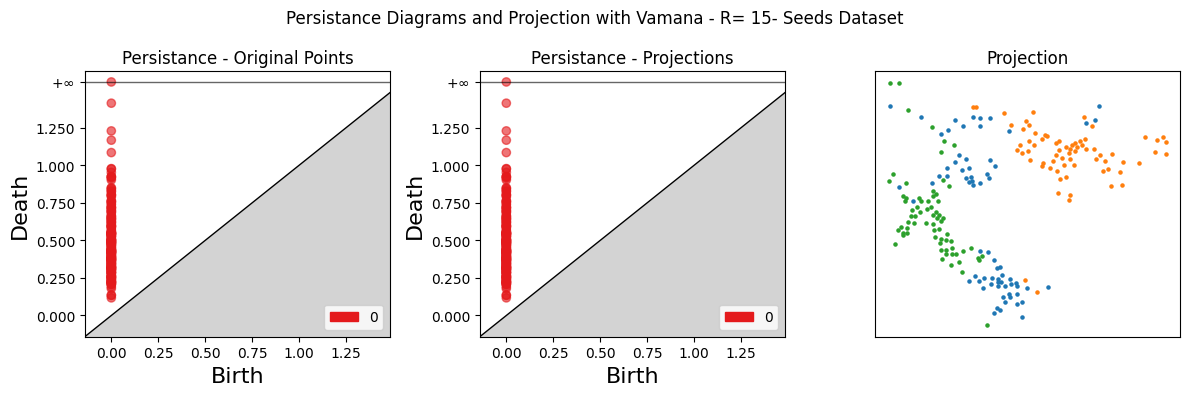

Bottleneck distance: 0.0000000000


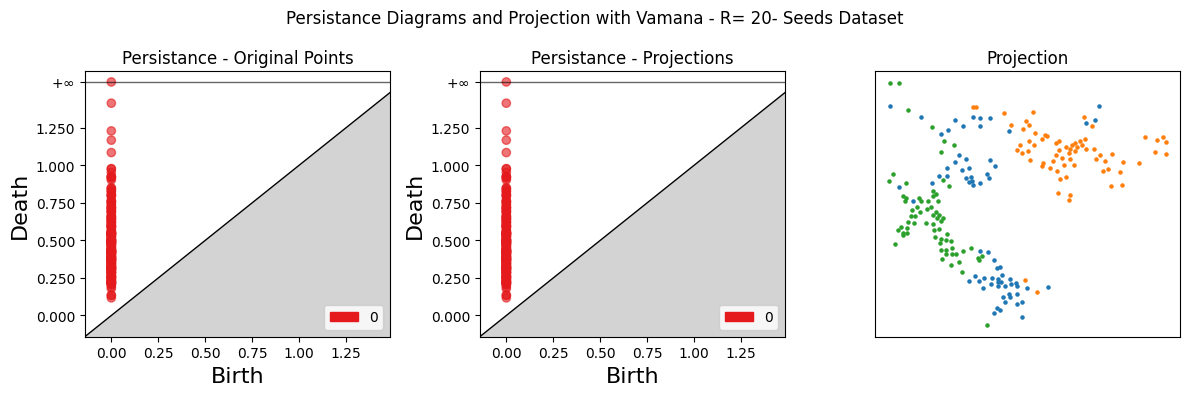

Bottleneck distance: 0.0000000000


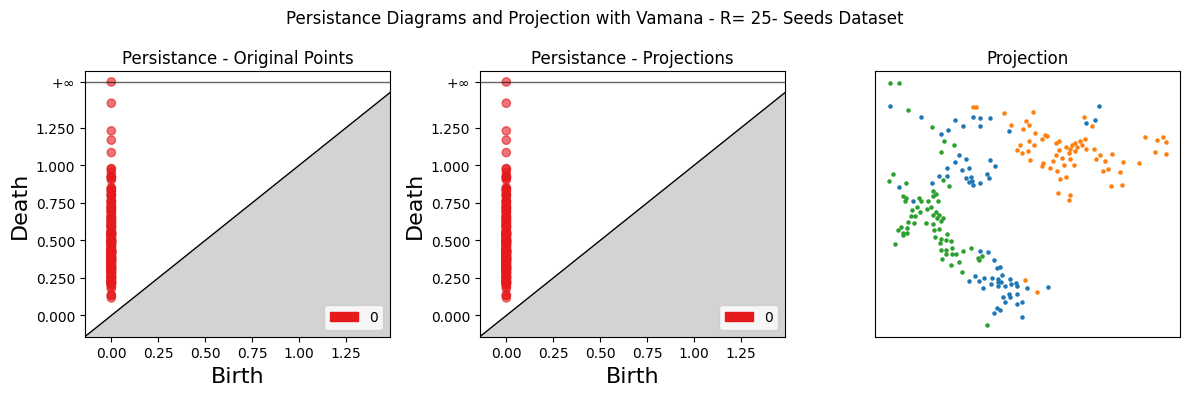

Bottleneck distance: 0.0000000000


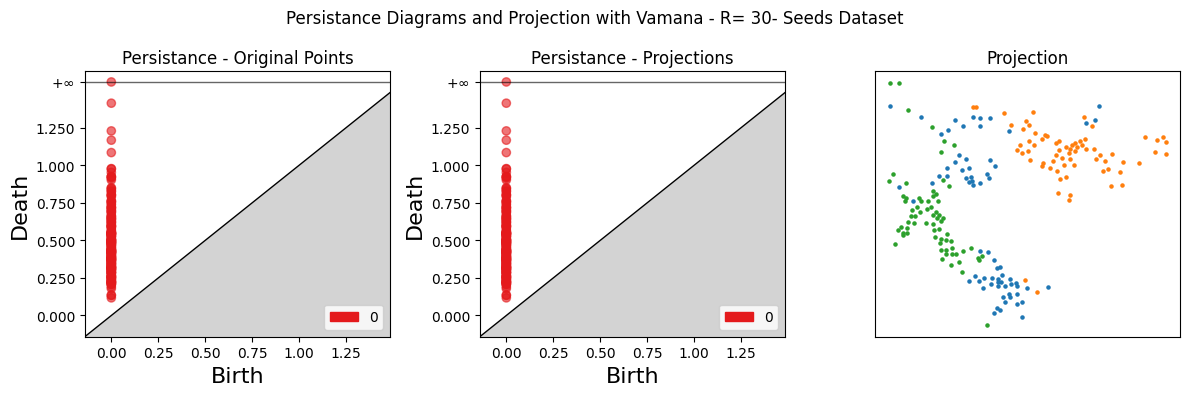

Bottleneck distance: 0.0000000000


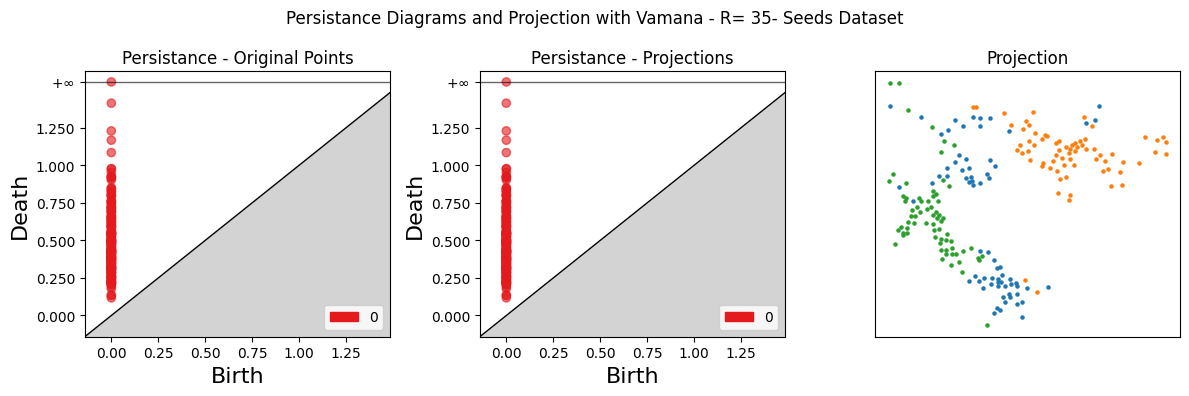

Bottleneck distance: 0.0000000000


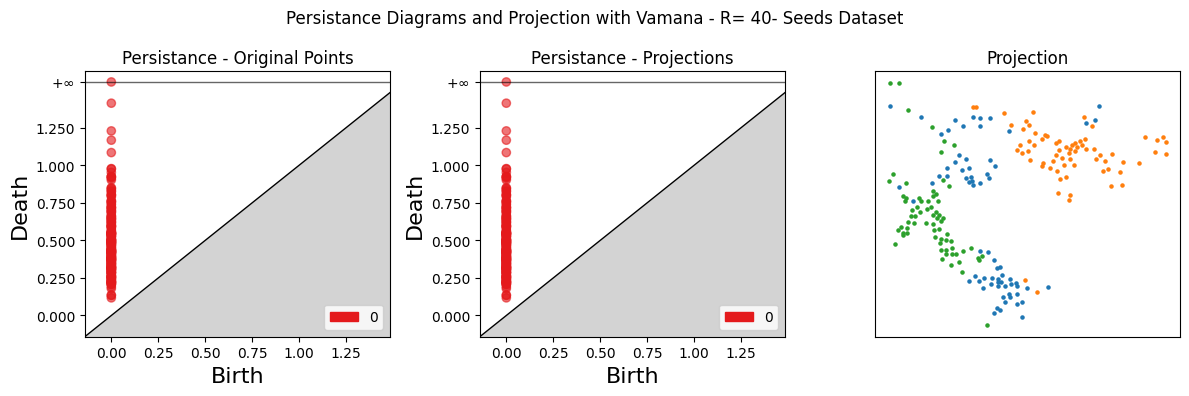

    R   time(s)
0   1  0.044618
1   5  1.607633
2  10  1.957492
3  15  2.125211
4  20  1.806821
5  25  4.902289
6  30  2.965600
7  35  2.312206
8  40  5.543499
    R   time(s)
0   1  0.163262
1   5  0.190156
2  10  0.128215
3  15  0.124253
4  20  0.127041
5  25  0.286402
6  30  0.122534
7  35  0.273472
8  40  0.226007
topomap original time:0.1394963264465332


In [7]:
Run_Vamana_test(X,y,dataset_name="Seeds")

## Cancer

In [8]:
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
y_column = 'Class'
X.fillna(method = 'ffill',inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_25864\3045979935.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method = 'ffill',inplace=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_25864\3045979935.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method = 'ffill',inplace=True)


Bottleneck distance: 0.0000000000


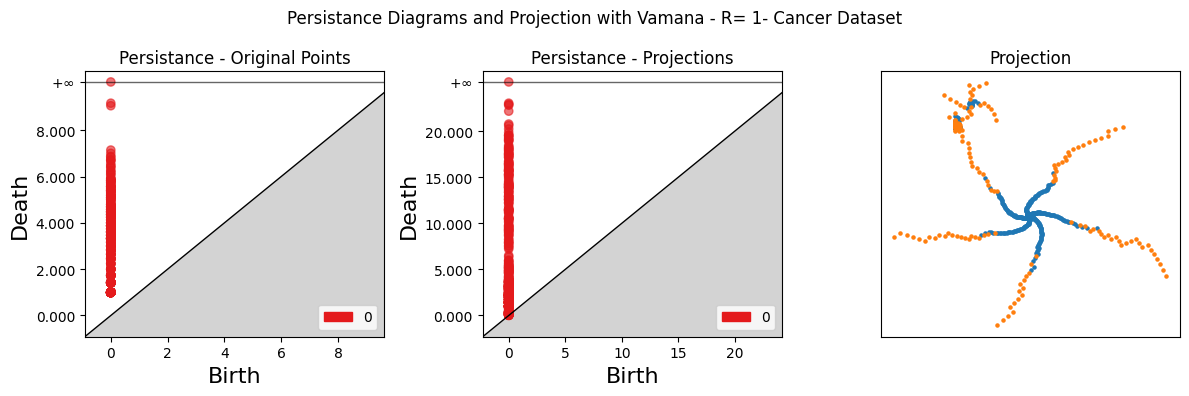

Bottleneck distance: 0.0000000000


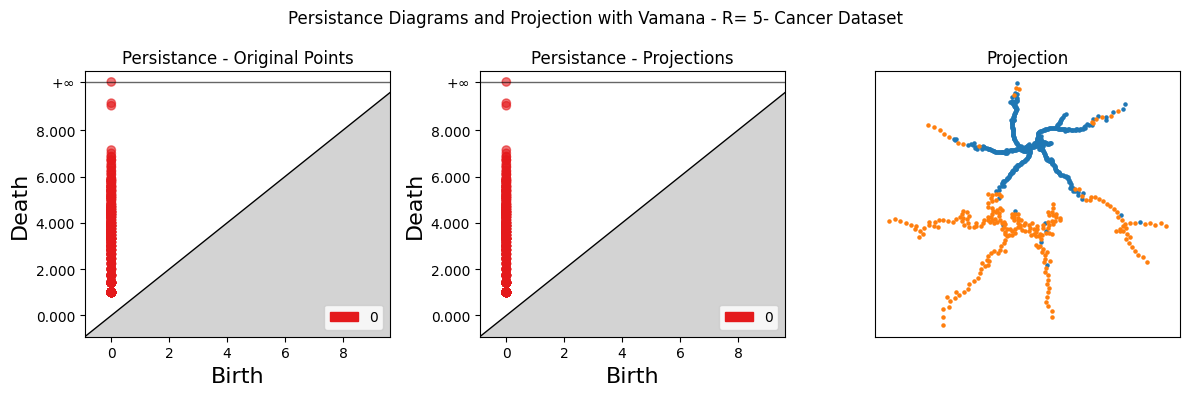

Bottleneck distance: 0.0000000000


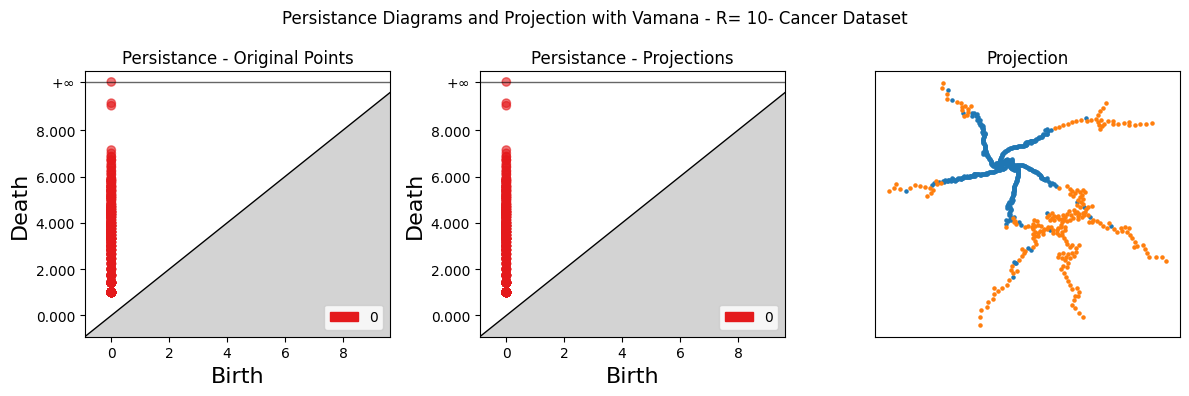

Bottleneck distance: 0.0000000000


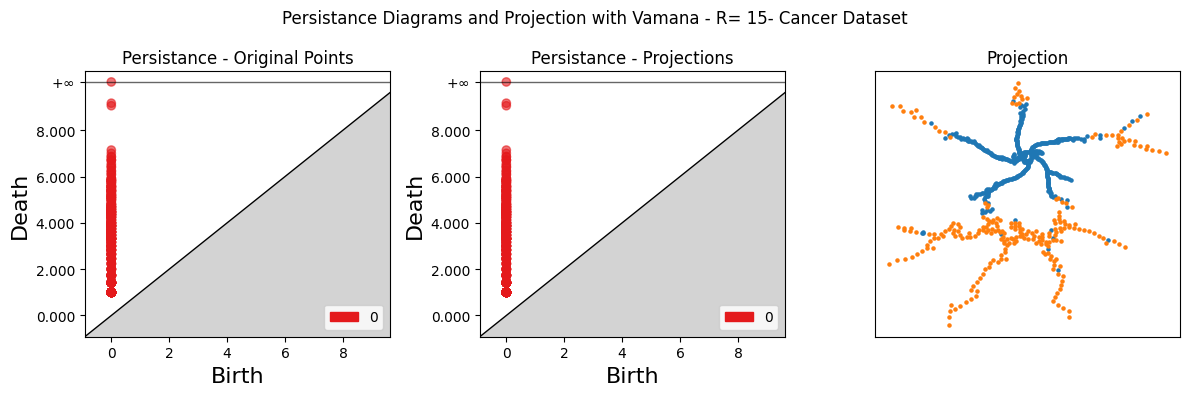

Bottleneck distance: 0.0000000000


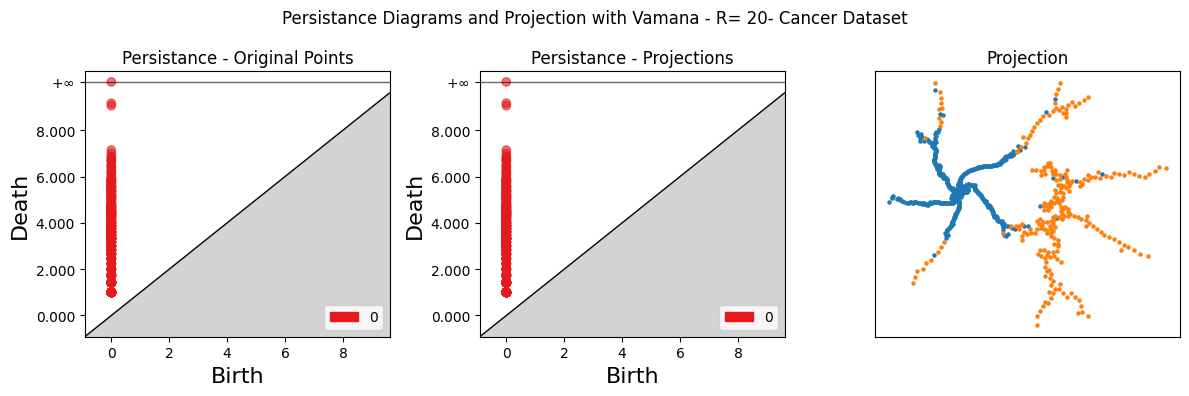

Bottleneck distance: 0.0000000000


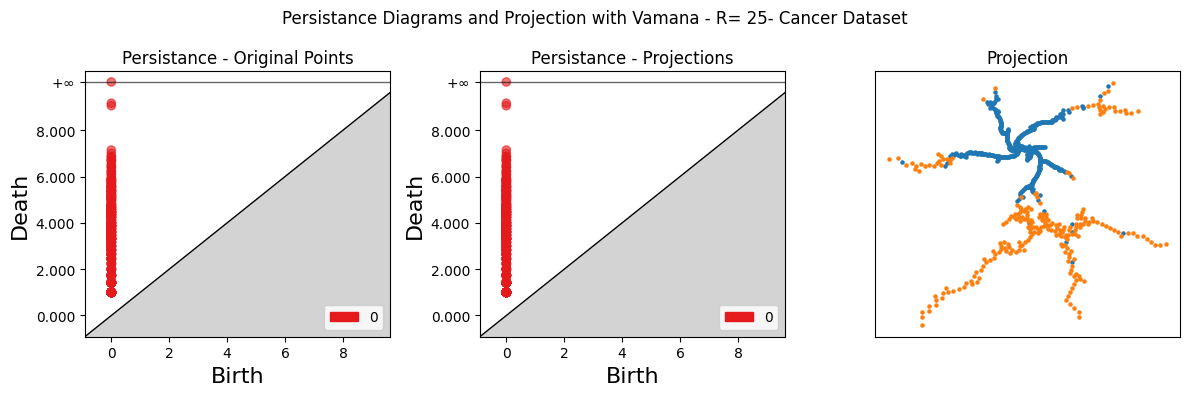

Bottleneck distance: 0.0000000000


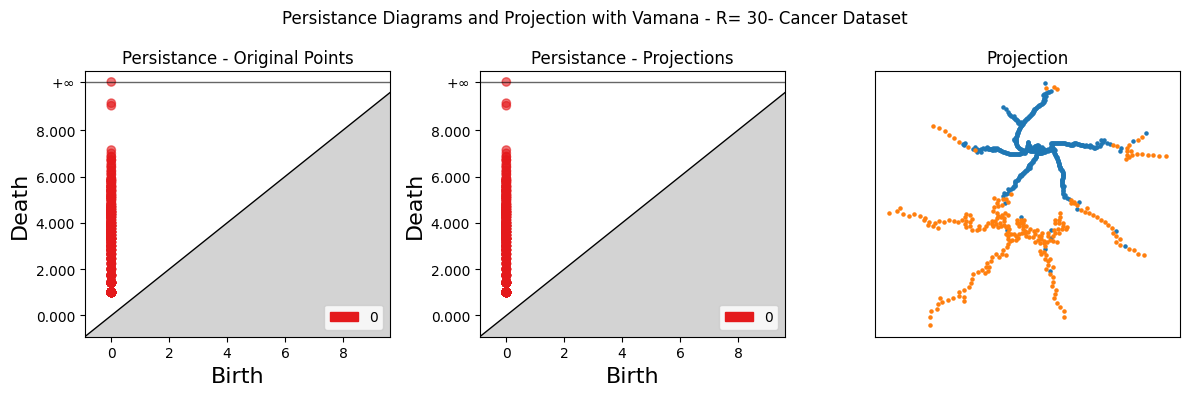

Bottleneck distance: 0.0000000000


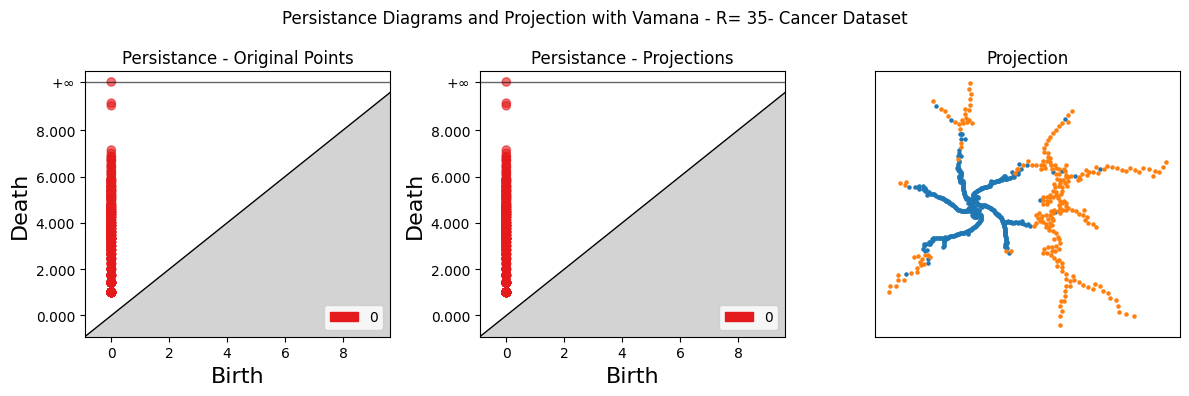

Bottleneck distance: 0.0000000000


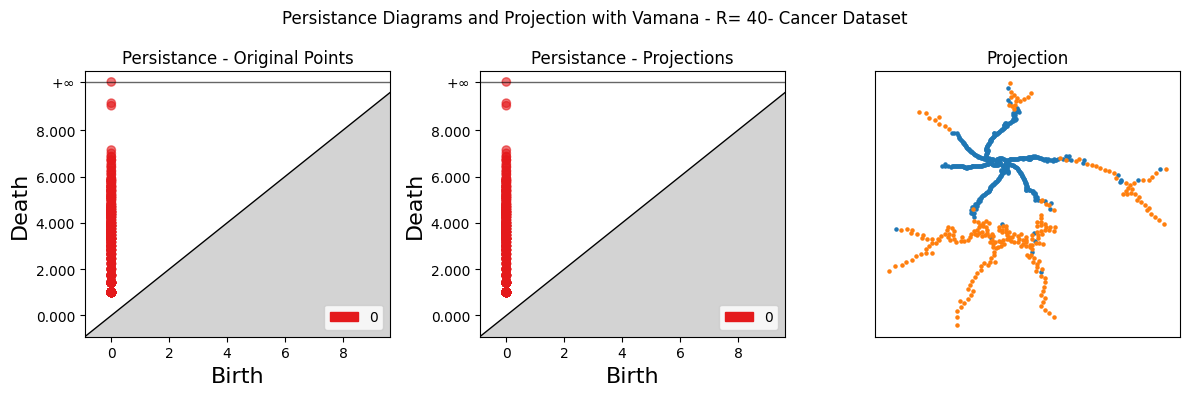

    R    time(s)
0   1   0.132280
1   5   7.133931
2  10  11.966645
3  15   9.014918
4  20  10.688004
5  25  15.903270
6  30  12.558477
7  35  16.623711
8  40  14.629265
    R   time(s)
0   1  0.548962
1   5  1.178376
2  10  0.745398
3  15  1.430306
4  20  0.673489
5  25  1.471279
6  30  1.456738
7  35  1.572159
8  40  1.074551
topomap original time:0.7443969249725342


In [9]:
Run_Vamana_test(X,y,dataset_name="Cancer",y_column= y_column)

## MFeat

In [10]:
data_mfeat = pd.read_csv('data/UCI/multiple+features/mfeat-kar', sep='\s+',
                         header=None,
                         names=['x'+str(i) for i in range(1,65)])
data_mfeat['class'] = 0
for i, row in data_mfeat.iterrows():
    data_mfeat.loc[i,'class'] = i//200

X = data_mfeat.drop(['class'], axis=1)
y = data_mfeat[['class']]

Bottleneck distance: 0.0000000000


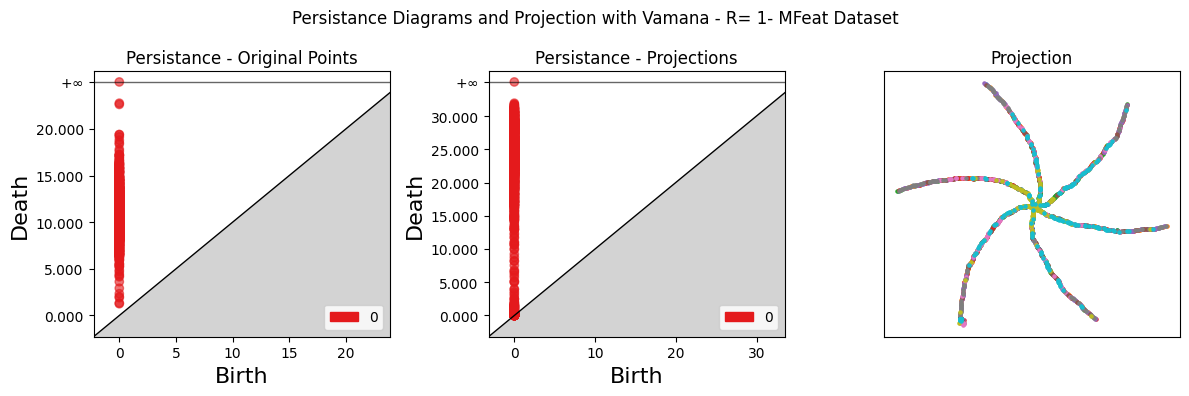

Bottleneck distance: 0.0000000000


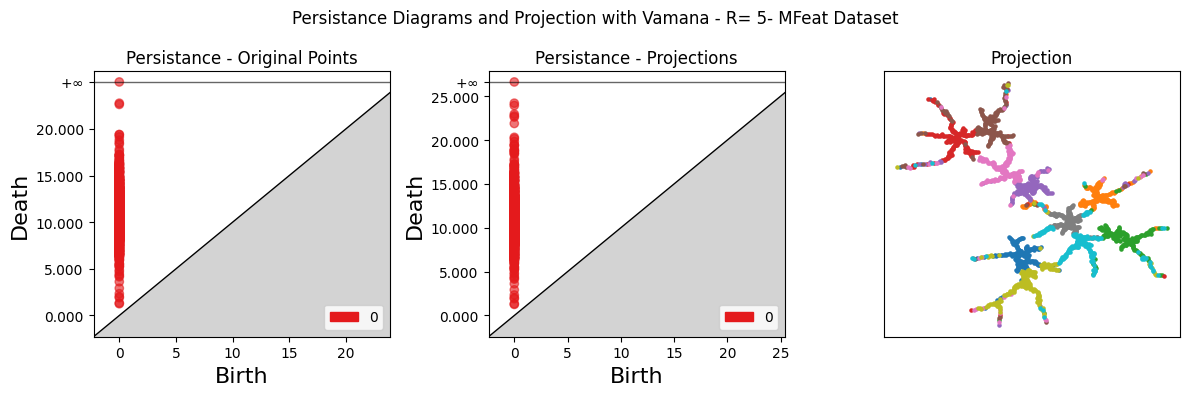

Bottleneck distance: 0.0000000000


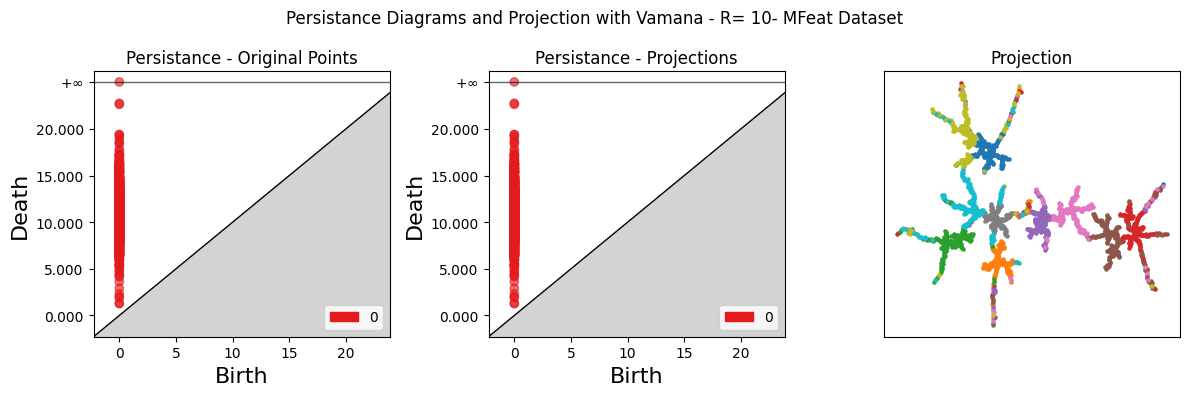

Bottleneck distance: 0.0000000000


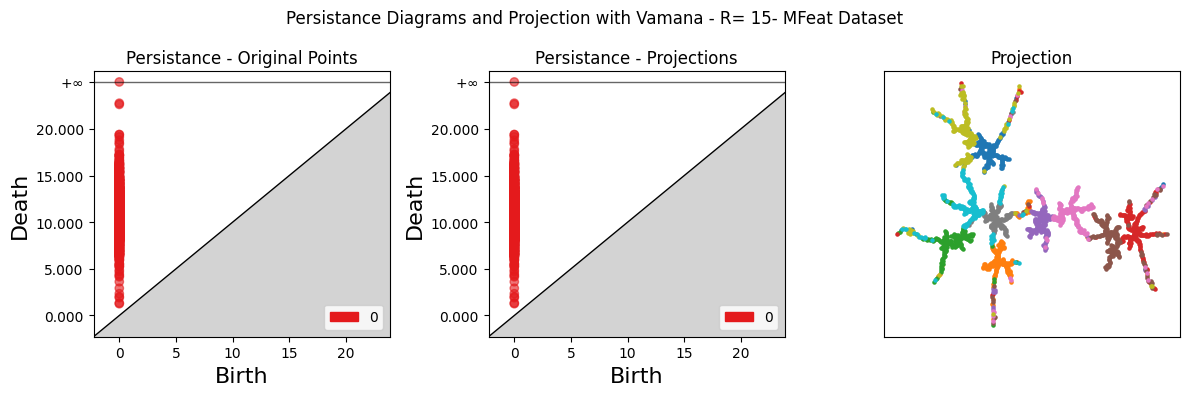

Bottleneck distance: 0.0000000000


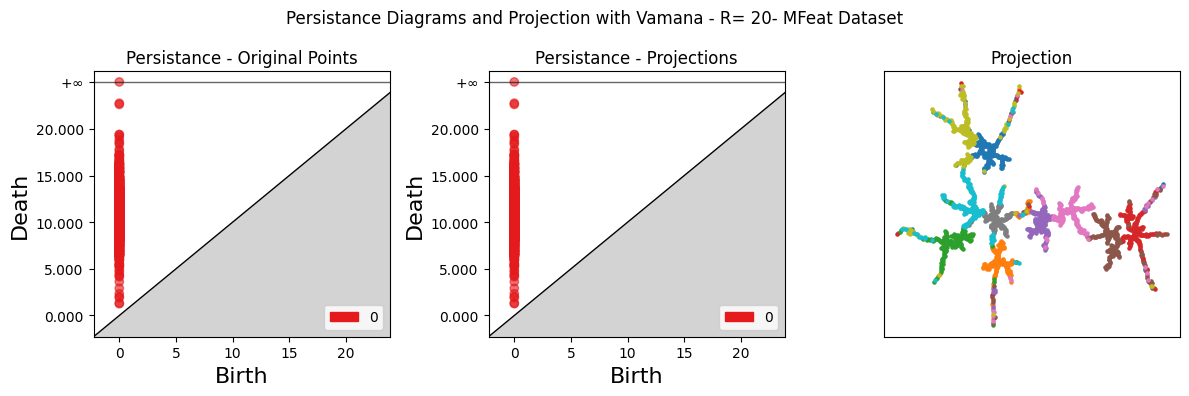

Bottleneck distance: 0.0000000000


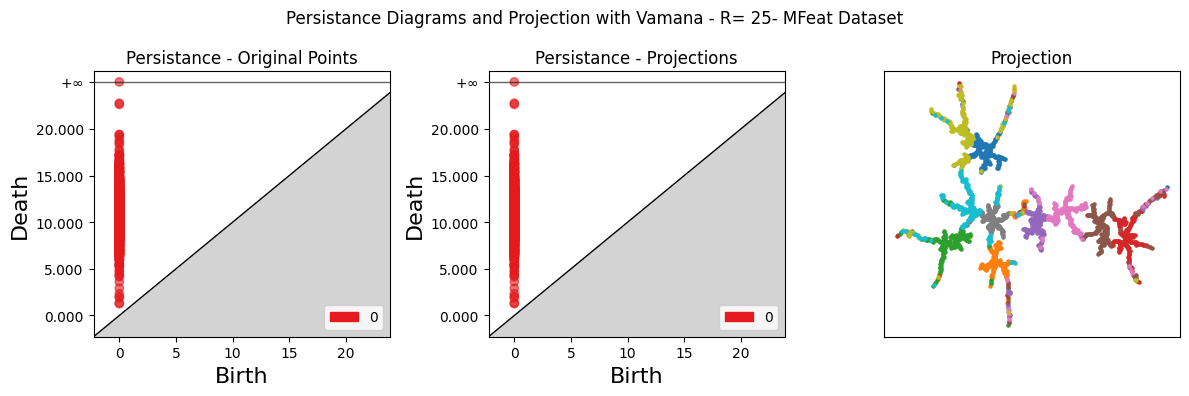

Bottleneck distance: 0.0000000000


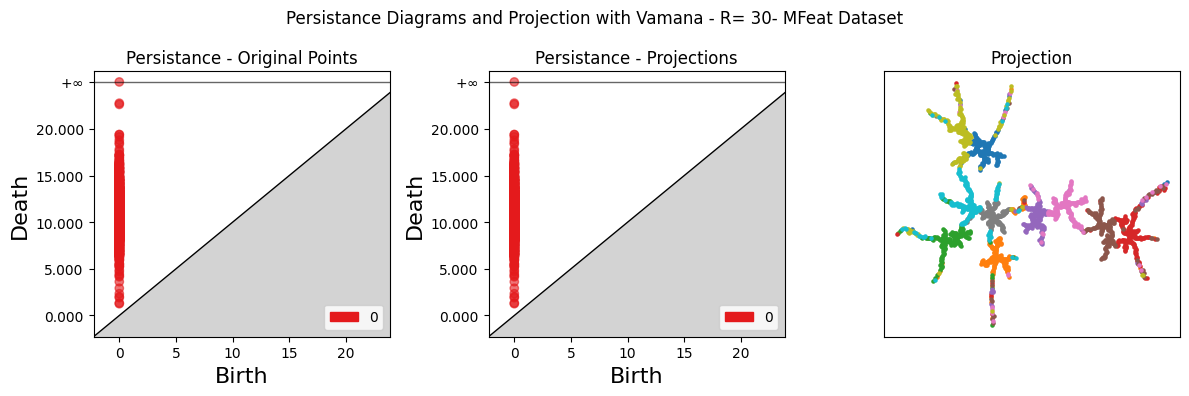

Bottleneck distance: 0.0000000000


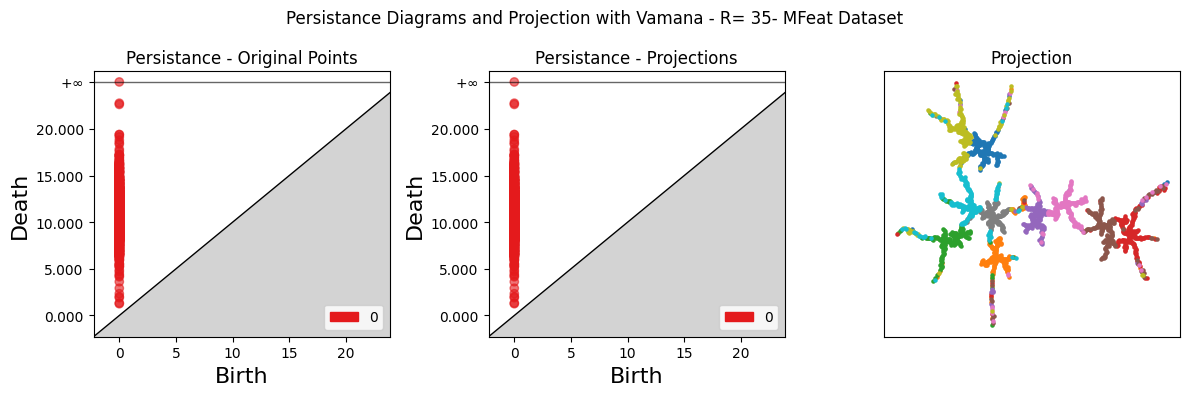

Bottleneck distance: 0.0000000000


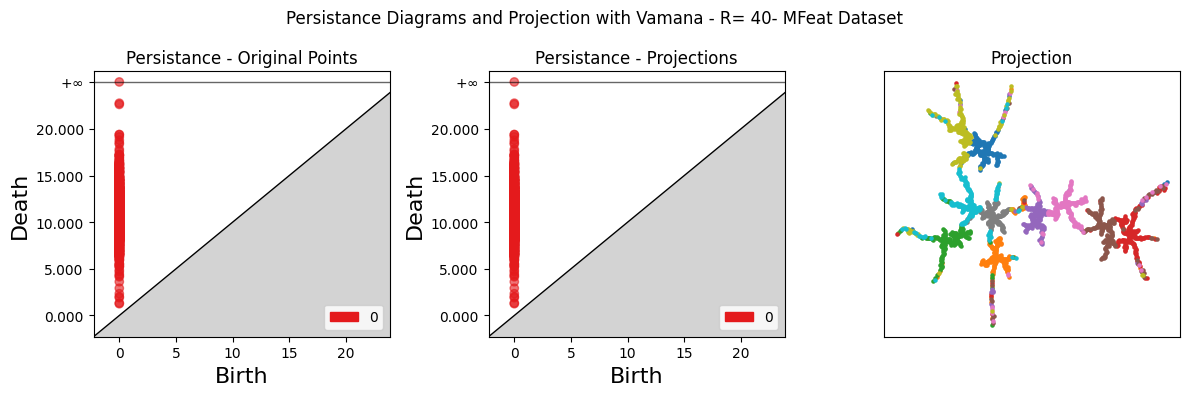

    R    time(s)
0   1   0.421253
1   5  35.887950
2  10  55.365262
3  15  65.898862
4  20  75.763047
5  25  72.910628
6  30  81.830555
7  35  74.980569
8  40  71.248708
    R   time(s)
0   1  2.467606
1   5  4.976048
2  10  5.094740
3  15  4.900090
4  20  3.879115
5  25  2.144035
6  30  4.065691
7  35  3.978283
8  40  3.662535
topomap original time:5.362588882446289


In [11]:
Run_Vamana_test(X,y,dataset_name="MFeat")